In [8]:
# import data

import pylab as py
import os
import numpy as np
import matplotlib.pyplot as plt

# print specification
np.set_printoptions(threshold = np.nan)

# folder containing only the data to be imported
path = 'C:\\Users\\abarrett.BNL\\Data\\2018.06.21\\ACS_3-5_layer_Gr_Cu\\HandScan\\'

# import x data (just one array to go with every y)
xfile = path + 'Single Spectrum_056_Spec.Data 1 (X-Axis).txt'
with open(xfile, 'r') as f:
    x = np.loadtxt(f)

# import y data (list of spectra)
ydata = []
for filename in os.listdir(path):
    if 'Y' in filename:
#         print(filename)
        fpath = path + filename
        with open(fpath, 'r') as f:
            y_temp = np.loadtxt(f)
        ydata.append(y_temp)


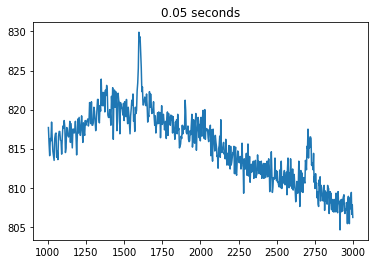

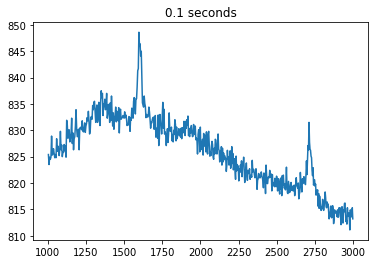

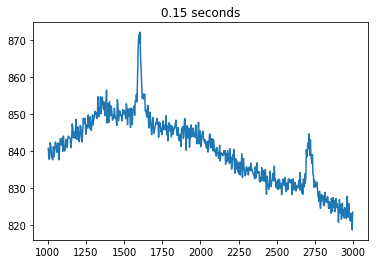

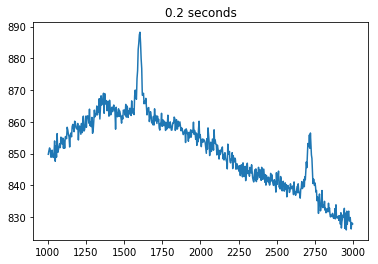

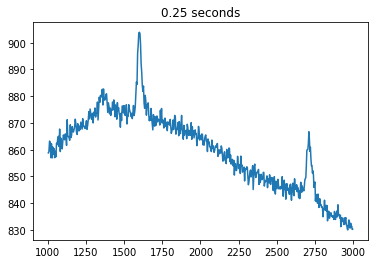

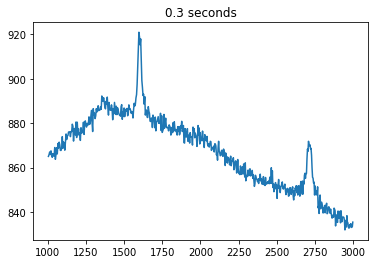

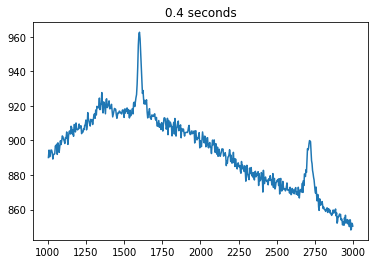

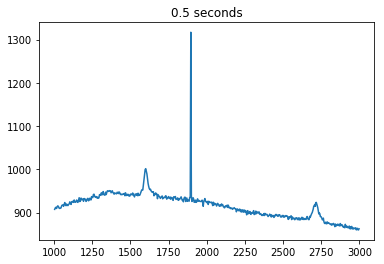

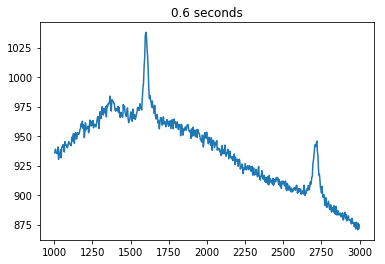

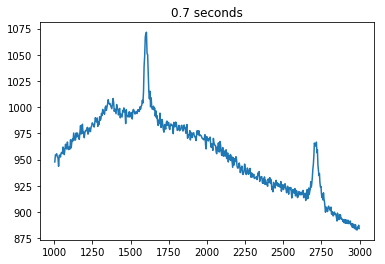

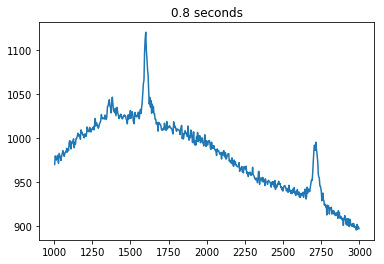

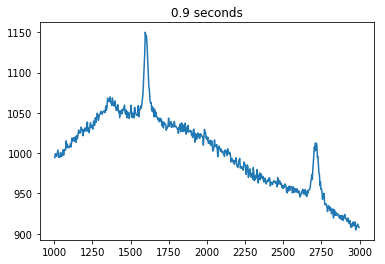

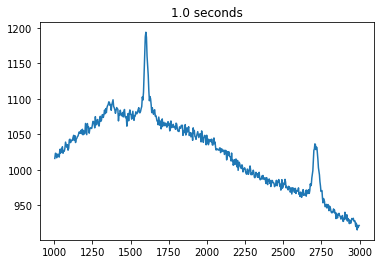

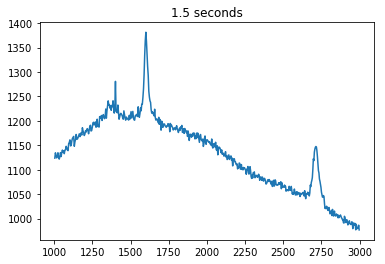

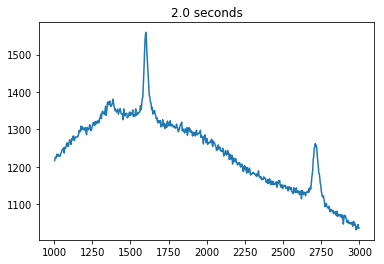

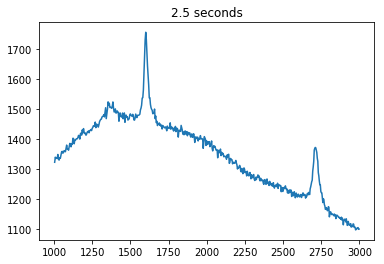

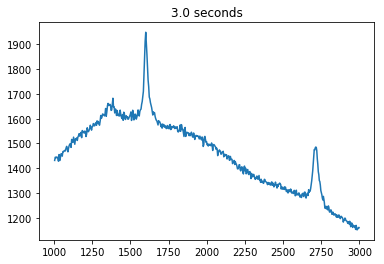

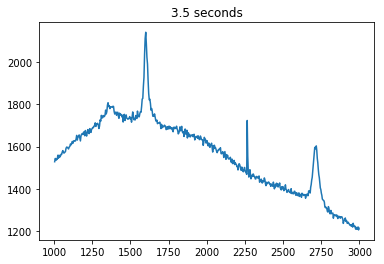

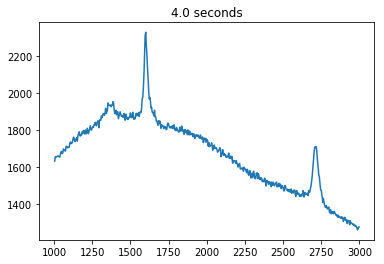

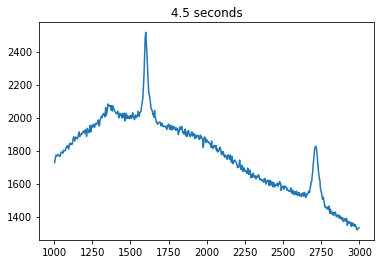

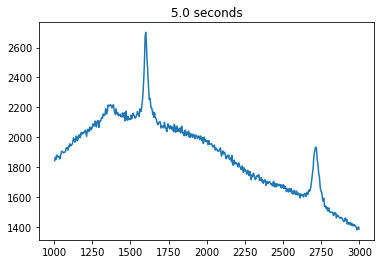

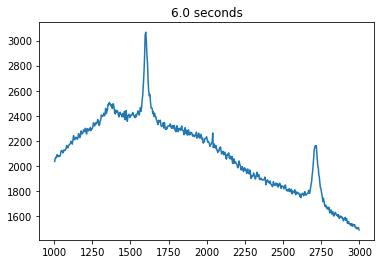

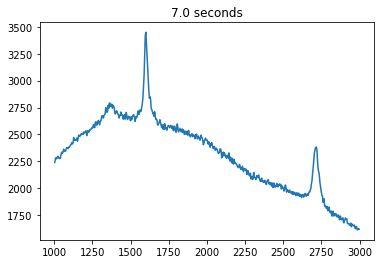

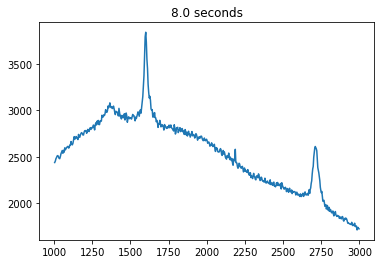

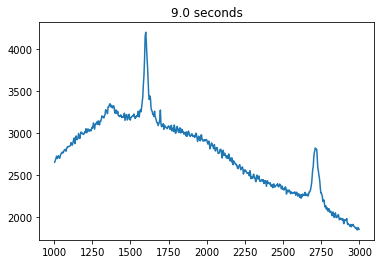

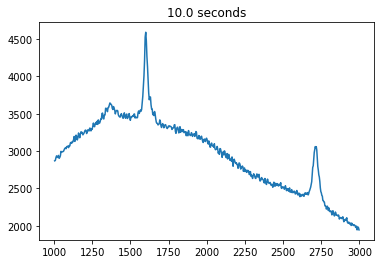

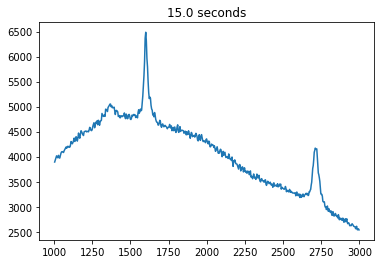

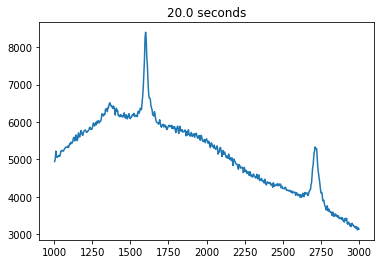

In [3]:
# plots

# titles = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 15.0, 20.0]
for i in range(len(ydata)):
    plt.figure(i)
    spec_start = np.argmax(x>1000)
    spec_end = np.argmax(x>3000)
    py.title(str(titles[i]) + ' seconds')
    py.plot(x[spec_start:spec_end],ydata[i][spec_start:spec_end])
    py.show()

In [5]:
# run get_ratio.ipynb so get_ratio function can be used in this notebook

%run get_ratio.ipynb

# inputs for function:
# get_ratio(xdata, ydata, start_G_range, end_G_range, start_G_peak, start_2D_range, end_2D_range, start_2D_peak)

# outputs: [ratio, height_G, height_2D]

In [4]:
# get ratio, heights for each spectrum

# set parameters
num_rows = 4
num_columns = 10 

start_G_range = 1400
end_G_range = 1800
start_G_peak = 1500

start_2D_range = 2500
end_2D_range = 2900
start_2D_peak = 2550

# initialization
ratios = np.array([])
heights_G = np.array([])
heights_2D = np.array([])

# run function on each spectrum
for y in ydata:
    info = get_ratio(x, y, start_G_range, end_G_range, start_G_peak, start_2D_range, end_2D_range, start_2D_peak)
    ratios = np.append(ratios, info[0])
    heights_G = np.append(heights_G, info[1])
    heights_2D = np.append(heights_2D, info[2])

# make each a matrix with same geometry as scan
# assumes that the scan starts at top left corner, moves right across an entire row, and then 
# returns to the left to start the next row and proceeds in this manner until it finishes in 
# the bottom right corner
ratio_map = np.reshape(ratios, (num_rows, num_columns))
height_G_map = np.reshape(heights_G, (num_rows, num_columns))
height_2D_map = np.reshape(heights_2D, (num_rows, num_columns))

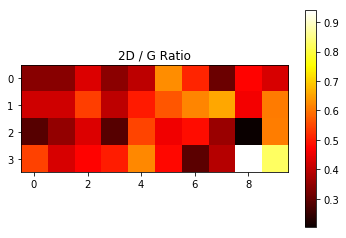

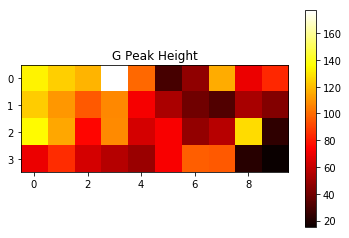

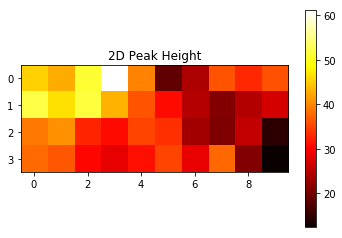

In [5]:
# make heatmaps 

plt.figure(1)
plt.imshow(ratio_map, cmap='hot', interpolation='nearest')
plt.title('2D / G Ratio')
plt.colorbar()
plt.show()

plt.figure(2)
plt.imshow(height_G_map, cmap='hot', interpolation='nearest')
plt.title('G Peak Height')
plt.colorbar()
plt.show()

plt.figure(3)
plt.imshow(height_2D_map, cmap='hot', interpolation='nearest')
plt.title('2D Peak Height')
plt.colorbar()
plt.show()


In [44]:
print(ratio_map)

[[0.34170092 0.34406286 0.43403849 0.34508143 0.39964607 0.62752082
  0.51340305 0.3119597  0.47499992 0.43051251]
 [0.42183317 0.42026327 0.54122211 0.40058255 0.50250907 0.56939172
  0.61959381 0.65684449 0.46258002 0.60897552]
 [0.2876338  0.35452488 0.43517681 0.28820908 0.54766419 0.45913327
  0.4875439  0.36406975 0.20288607 0.61187437]
 [0.54627778 0.42962551 0.47686051 0.50378838 0.62208848 0.48246938
  0.29478485 0.39336892 0.94180285 0.82535998]]


In [6]:
# set parameters

start_G_range = 1400
end_G_range = 1800
start_G_peak = 1500

start_2D_range = 2500
end_2D_range = 2900
start_2D_peak = 2550

# initialization
ratios = np.array([])
heights_G = np.array([])
heights_2D = np.array([])

# run function on each spectrum
for y in ydata:
    info = get_ratio(x, y, start_G_range, end_G_range, start_G_peak, start_2D_range, end_2D_range, start_2D_peak)
    ratios = np.append(ratios, info[0])
    heights_G = np.append(heights_G, info[1])
    heights_2D = np.append(heights_2D, info[2])
    
print('ratios : ' + str(ratios))
print('G heights : ' + str(heights_G))
print('2D heights : ' + str(heights_2D))

ratios : [0.58201479 0.68774079 0.60627499 0.72785084 0.69991357 0.68160491
 0.70852577 0.69896736 0.66887031 0.70355208 0.70260535 0.67112692
 0.68131581 0.67189613 0.68542787 0.68671478 0.68677378 0.68286572
 0.67888698 0.67422011 0.66149694 0.68634904 0.6726381  0.66694086
 0.67324703 0.67814152 0.68293111 0.67945741]
G heights : [  10.93759312   15.89297138   23.52084352   27.12592665   33.38196089
   38.94802447   50.33275632   63.95733995   74.9044462    85.0846752
   96.71255935  109.72261411  125.09862635  181.24025718  233.95014907
  294.45694032  350.54927201  418.56147116  473.87859916  532.58667353
  590.57889764  698.80711699  818.62019129  945.72838282 1041.99994253
 1170.8103595  1731.36768016 2337.043374  ]
2D heights : [   6.36584096   10.93024462   14.26009925   19.74362855   23.36448746
   26.54716489   35.66205501   44.70409305   50.10136033   59.86150037
   67.95076152   73.63780044   85.23167172  121.77462672  160.35595254
  202.20793206  240.74804718  285.8212814